In [92]:
import pandas as pd
import ast
from sklearn.cluster import KMeans
from sklearn.manifold import MDS
from sklearn.metrics import silhouette_score, silhouette_samples
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [93]:
place = pd.read_csv('../Data/whyout_data/place.csv') # shape(4697,10), place idx에서 23개가 비어있음
product = pd.read_csv('../Data/whyout_data/product.csv') # shape(5834,11), product idx에서 538개가 비어있음
video = pd.read_csv('../Data/whyout_data/video.csv') # shape(3250, 9), video idx에서 315개가 비어있음

In [94]:
product_drop = product.iloc[:,1:8]

In [95]:
item_cleaned = product_drop.dropna()
item_cleaned

,카테고리1,카테고리2,색상,기능성(합집합),휴대성,친환경,디자인
0,"[0,0,0,0,1,0,0,0,0,0,0]","[1,0,0]","[0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0]","[1,0,0,0,0,0]","[0,0,1,0]","[1,1,0]","[1,1,0,0,0,0,1,0,0,0]"
1,"[0,0,0,0,1,0,0,0,0,0,0]","[1,0,0]","[0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0]","[1,0,0,0,0,0]","[0,0,1,0]","[1,1,0]","[1,1,0,0,0,0,1,0,0,0]"
2,"[0,0,0,0,1,0,0,0,0,0,0]","[1,0,0]","[0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0]","[1,0,0,0,0,0]","[0,0,1,0]","[1,1,0]","[1,1,0,0,0,0,1,0,0,0]"
3,"[0,0,0,0,1,0,0,0,0,0,0]","[1,0,0]","[0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0]","[1,0,0,0,0,0]","[0,0,1,0]","[1,1,0]","[1,1,0,0,0,0,1,0,0,0]"
4,"[0,0,0,0,1,0,0,0,0,0,0]","[1,0,0]","[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0]","[1,0,0,0,0,0]","[0,0,1,0]","[1,1,0]","[1,1,0,0,0,0,1,0,0,0]"
...,...,...,...,...,...,...,...
5765,"[0,0,0,0,0,0,0,0,0,1,0]","[0,1,0]","[0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0]","[0,0,0,0,0,0]","[0,0,0,0]","[0,0,0]","[0,0,0,0,0,0,0,0,0,0]"
5814,"[0,0,0,0,0,0,1,0,0,0,0]","[1,0,0]","[0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0]","[1,0,1,0,0,0]","[1,1,0,0]","[0,1,0]","[0,0,0,0,0,0,1,0,1,0]"
5815,"[0,0,0,0,0,0,1,0,0,0,0]","[1,0,0]","[0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0]","[1,0,1,0,0,0]","[1,1,0,0]","[0,1,0]","[0,0,0,0,0,0,1,0,1,0]"
5819,"[0,0,0,0,0,0,0,0,1,0,0]","[0,1,0]","[0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0]","[0,0,1,0,0,0]","[0,0,1,0]","[1,1,0]","[0,0,0,0,0,0,0,1,0,0]"


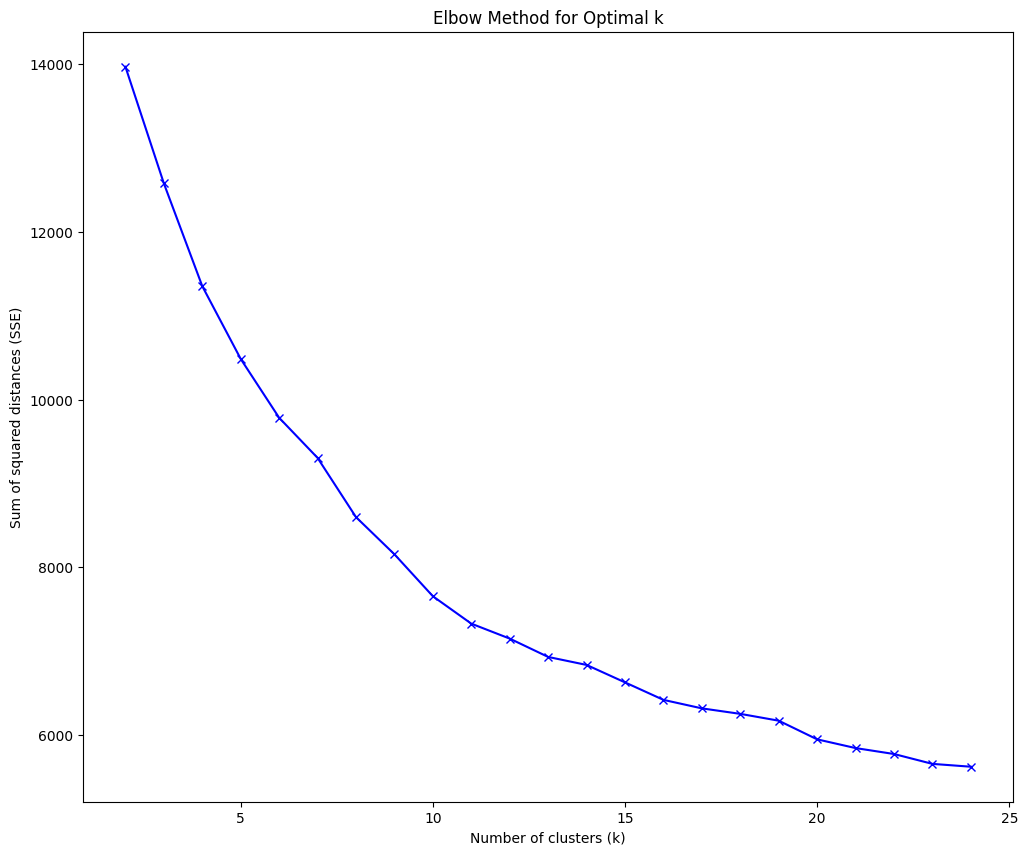

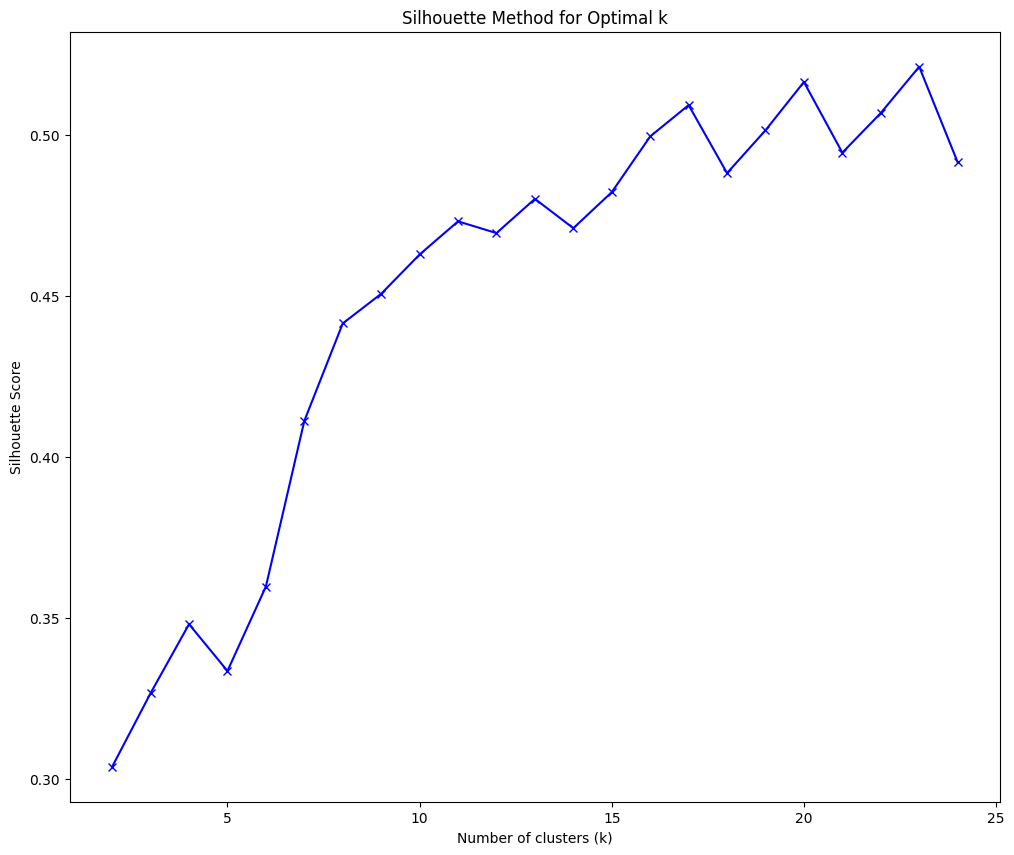

Optimal k by Silhouette method: 23


In [113]:
# # NaN 값 제거
# df_cleaned = item_cleaned.dropna()

# # 문자열을 리스트로 변환하는 함수
# def str_to_list(string):
#     try:
#         return ast.literal_eval(string.strip())
#     except Exception as e:
#         print(f"Error parsing string: {string}")
#         return []

# # 문자열을 리스트로 변환
# for col in df_cleaned.columns[1:]:
#     df_cleaned[col] = df_cleaned[col].apply(str_to_list)

# # 리스트를 수치형 데이터로 변환
# expanded_data = []
# for index, row in df_cleaned.iterrows():
#     combined_row = []
#     for col in df_cleaned.columns[1:]:
#         combined_row.extend(row[col])
#     expanded_data.append(combined_row)

# df_expanded = pd.DataFrame(expanded_data)

# # 엘보우 방법을 사용하여 최적의 클러스터 수 찾기
# sse = []
# silhouette_scores = []
# K = range(2, 25)

# for k in K:
#     kmeans = KMeans(n_clusters=k, random_state=0)
#     kmeans.fit(df_expanded)
#     sse.append(kmeans.inertia_)
#     silhouette_scores.append(silhouette_score(df_expanded, kmeans.labels_))

# # 엘보우 방법 시각화
# plt.figure(figsize=(12, 10))
# plt.plot(K, sse, 'bx-')
# plt.xlabel('Number of clusters (k)')
# plt.ylabel('Sum of squared distances (SSE)')
# plt.title('Elbow Method for Optimal k')
# plt.show()

# # 실루엣 방법 시각화
# plt.figure(figsize=(12, 10))
# plt.plot(K, silhouette_scores, 'bx-')
# plt.xlabel('Number of clusters (k)')
# plt.ylabel('Silhouette Score')
# plt.title('Silhouette Method for Optimal k')
# plt.show()

# max_silhouette_index = silhouette_scores.index(max(silhouette_scores))
# optimal_k_silhouette = K[max_silhouette_index]
# print("Optimal k by Silhouette method:", optimal_k_silhouette)

In [114]:
# NaN 값 제거
df_cleaned = item_cleaned.dropna()

# 문자열을 리스트로 변환하는 함수
def str_to_list(string):
    try:
        return ast.literal_eval(string.strip())
    except Exception as e:
        print(f"Error parsing string: {string}")
        return []

# 문자열을 리스트로 변환
for col in df_cleaned.columns[1:]:
    df_cleaned[col] = df_cleaned[col].apply(str_to_list)

# 리스트를 수치형 데이터로 변환
expanded_data = []
for index, row in df_cleaned.iterrows():
    combined_row = []
    for col in df_cleaned.columns[1:]:
        combined_row.extend(row[col])
    expanded_data.append(combined_row)

df_expanded = pd.DataFrame(expanded_data)

# K-means 클러스터링 수행
n_clusters = 23  # 클러스터 수 설정
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(df_expanded)

# 클러스터 결과를 원본 데이터프레임에 추가
df_cleaned['Cluster'] = kmeans.labels_

# 실루엣 스코어 계산
silhouette_avg = silhouette_score(df_expanded, kmeans.labels_)
silhouette_values = silhouette_samples(df_expanded, kmeans.labels_)

# MDS를 사용하여 3D로 축소
mds = MDS(n_components=3, random_state=0)
mds_components = mds.fit_transform(df_expanded)

# MDS 결과를 데이터프레임으로 변환
df_mds = pd.DataFrame(data=mds_components, columns=['MDS1', 'MDS2', 'MDS3'])
df_mds['Cluster'] = df_cleaned['Cluster']
df_mds['Silhouette'] = silhouette_values

# Plotly를 사용하여 MDS 결과 시각화
fig = go.Figure()

# 각 클러스터별로 데이터를 추가
for cluster in range(n_clusters):
    cluster_data = df_mds[df_mds['Cluster'] == cluster]
    fig.add_trace(go.Scatter3d(
        x=cluster_data['MDS1'],
        y=cluster_data['MDS2'],
        z=cluster_data['MDS3'],
        mode='markers',
        marker=dict(size=5),
        name=f'Cluster {cluster}',
        hovertext=cluster_data['Silhouette'],
        hoverinfo='text'
    ))

# 클러스터별로 볼 수 있게 버튼 추가
button_all = dict(label='All Clusters',
                  method='update',
                  args=[{'visible': [True] * n_clusters},
                        {'title': 'All Clusters'}])

buttons = [button_all]
for i in range(n_clusters):
    buttons.append(dict(label=f'Cluster {i}',
                        method='update',
                        args=[{'visible': [j == i for j in range(n_clusters)]},
                              {'title': f'Cluster {i}'}]))

fig.update_layout(
    updatemenus=[dict(type='dropdown',
                      showactive=True,
                      buttons=buttons)],
    title=f'K-means Clustering Results with MDS (Silhouette Score: {silhouette_avg:.2f})',
    scene=dict(
        xaxis_title='MDS Dimension 1',
        yaxis_title='MDS Dimension 2',
        zaxis_title='MDS Dimension 3'
    ),
    width=1000,  # 그래프 너비
    height=800   # 그래프 높이
)

fig.show()

# 실루엣 스코어 시각화
silhouette_fig = go.Figure()

for i in range(n_clusters):
    ith_cluster_silhouette_values = silhouette_values[df_cleaned['Cluster'] == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = size_cluster_i
    silhouette_fig.add_trace(go.Scatter(
        y=list(range(y_upper)),
        x=ith_cluster_silhouette_values,
        mode='lines',
        name=f'Cluster {i}'
    ))

silhouette_fig.update_layout(
    title='Silhouette Scores for Each Sample',
    xaxis_title='Silhouette Score',
    yaxis_title='Sample',
    width=1000,  # 그래프 너비
    height=800   # 그래프 높이
)

silhouette_fig.show()